# Proyek Analisis Data: [Air-quality-dataset]
- **Nama:** [Alif Virdio Yudhistira Widyawan]
- **Email:** [m123b4ky0389@bangkit.academy]
- **ID Dicoding:** [Alif Virdio Yudhistira Widyawan]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Berapa total jumlah penyewaan sepeda pada musim gugur (Fall)?
- Pertanyaan 2 : Bulan apa yang mengalami penurunan terbesar dalam jumlah pengguna terdaftar, dan berapa selisihnya?
- Pertanyaan 3 : Pada bulan apa jumlah pengguna terdaftar mencapai puncaknya di tahun 2011, dan berapa jumlahnya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_dataframe = pd.read_csv('data\day.csv')
day_dataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_dataframe = pd.read_csv('data\hour.csv')
hour_dataframe.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

In [4]:
day_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_dataframe.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
day_dataframe.duplicated().sum()

0

In [7]:
day_dataframe.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_dataframe.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
hour_dataframe.duplicated().sum()

0

In [11]:
hour_dataframe.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- xxx
- xxx

### Cleaning Data

In [12]:
datatime_col = ["dteday"]

for column in datatime_col :
    day_dataframe[column] = pd.to_datetime(day_dataframe[column])

In [13]:
day_dataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
datetime_col = ["dteday"]

for column in datetime_col :
    hour_dataframe[column] = pd.to_datetime(hour_dataframe[column])

In [15]:
hour_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [16]:
day_dataframe.rename(columns={
    'instant' : 'record_id',
    'yr' : 'year',
    'dteday' : 'date-day',
    'mnth' : 'month',
    'hum' : 'humidity',
    'weathersit' : 'weather-condition',
    'cnt' : 'count_total'
},inplace=True)

In [17]:
day_dataframe.tail()

,record_id,date-day,season,year,month,holiday,weekday,workingday,weather-condition,temp,atemp,humidity,windspeed,casual,registered,count_total
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [18]:
hour_dataframe.rename(columns={
    'instant' : 'record_id',
    'yr' : 'year',
    'dteday' : 'date-day',
    'mnth' : 'month',
    'hum' : 'humidity',
    'weathersit' : 'weather-condition',
    'cnt' : 'count_total'
},inplace=True)

In [19]:
hour_dataframe.tail()

,record_id,date-day,season,year,month,hr,holiday,weekday,workingday,weather-condition,temp,atemp,humidity,windspeed,casual,registered,count_total
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
day_dataframe.groupby(by='season').record_id.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: record_id, dtype: int64

In [21]:
day_dataframe.groupby(by="weather-condition").record_id.nunique().sort_values(ascending=False)

weather-condition
1    463
2    247
3     21
Name: record_id, dtype: int64

In [22]:
day_dataframe.groupby(by='weekday').record_id.nunique().sort_values(ascending=False)

weekday
0    105
1    105
6    105
2    104
3    104
4    104
5    104
Name: record_id, dtype: int64

In [23]:
day_dataframe.groupby(by='season').record_id.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: record_id, dtype: int64

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [24]:
season_dataframe = day_dataframe.groupby("season").count_total.sum().sort_values(ascending=False).reset_index()

In [25]:
season_rename = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_dataframe['season'] = season_dataframe['season'].replace(season_rename)

In [26]:
season_dataframe.head()

,season,count_total
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13596\2914059813.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count_total", y="season", data=season_dataframe.head(), palette=colors, ax=ax[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13596\2914059813.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count_total", y="season", data=season_dataframe.sort_values(by="count_total", ascending=True).head(), palette=colors, ax=ax[1])


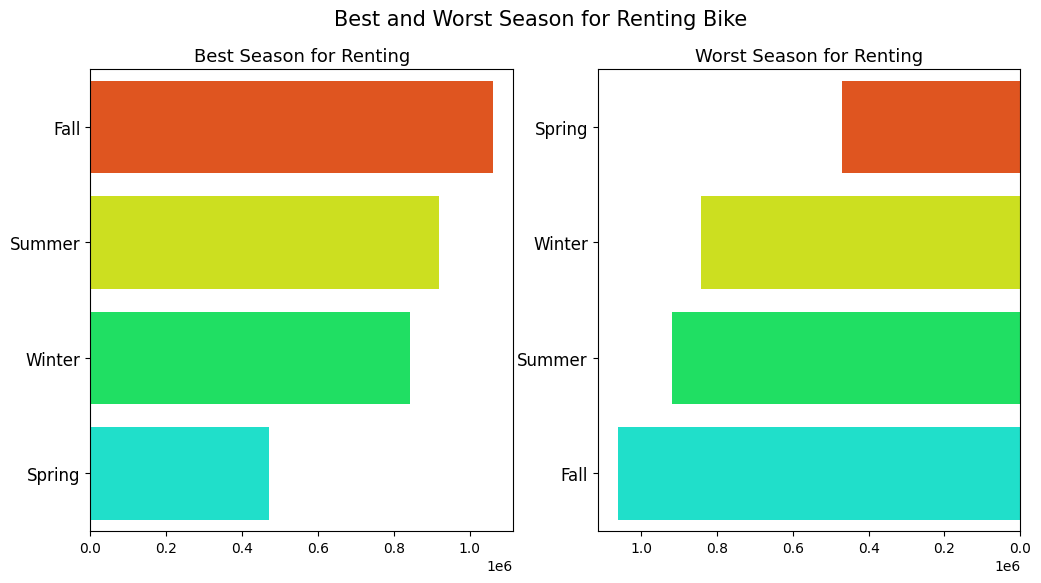

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

colors = ["#ff4700", "#e5ff00", "#00ff59", "#00ffe3"]

sns.barplot(x="count_total", y="season", data=season_dataframe.head(), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Season for Renting", loc="center", fontsize=13)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="count_total", y="season", data=season_dataframe.sort_values(by="count_total", ascending=True).head(), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].set_title("Worst Season for Renting", loc="center", fontsize=13)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Season for Renting Bike", fontsize=15)
plt.show()

### Pertanyaan 2:

In [28]:
user_month_df = day_dataframe.groupby("month").registered.sum().reset_index()
print(user_month_df)

    month  registered
0       1      122891
1       2      136389
2       3      184476
3       4      208292
4       5      256401
5       6      272436
6       7      266791
7       8      279155
8       9      275668
9      10      262592
10     11      218228
11     12      189343


In [29]:
month_rename = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
user_month_df['month'] = user_month_df['month'].replace(month_rename)

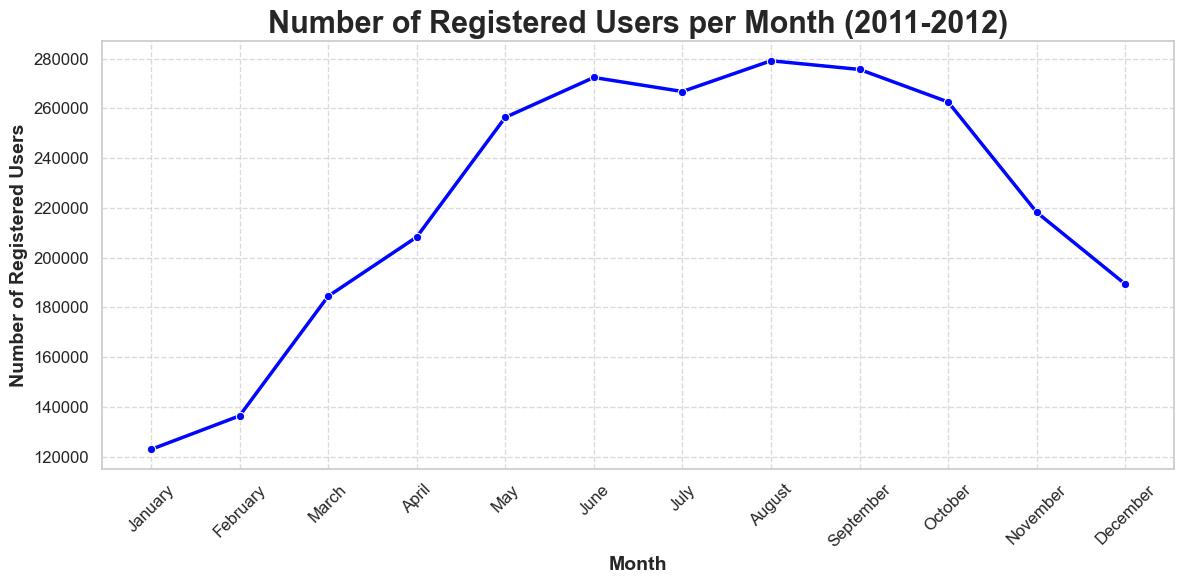

In [30]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Create the line plot with Seaborn
sns.lineplot(
    data=user_month_df,
    x="month",
    y="registered",
    marker='o',
    linewidth=2.5,
    color="#0006ff"
)

# Enhancing the plot appearance
plt.title("Number of Registered Users per Month (2011-2012)", loc="center", fontsize=22, fontweight='bold')
plt.xlabel("Month", fontsize=14, fontweight='bold')
plt.ylabel("Number of Registered Users", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Pertanyaan 3:

In [31]:
registered_user_df = day_dataframe.loc[:, ['year', 'month', 'registered']]

In [32]:
registered_user_df.head()

,year,month,registered
0,0,1,654
1,0,1,670
2,0,1,1229
3,0,1,1454
4,0,1,1518


In [33]:
month_rename = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

registered_user_df['month'] = registered_user_df['month'].replace(month_rename)


In [34]:
registered_user_df = registered_user_df.groupby(['year', 'month'])['registered'].sum().reset_index()

In [35]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
registered_user_df['month'] = pd.Categorical(registered_user_df['month'], categories=month_order, ordered=True)

In [36]:
registered_user_df.head()

,year,month,registered
0,0,April,72524
1,0,August,107849
2,0,December,78875
3,0,February,41973
4,0,January,35116


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13596\627703545.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  registered_user_df['month'] = registered_user_df['month'].replace(month_abbrev)


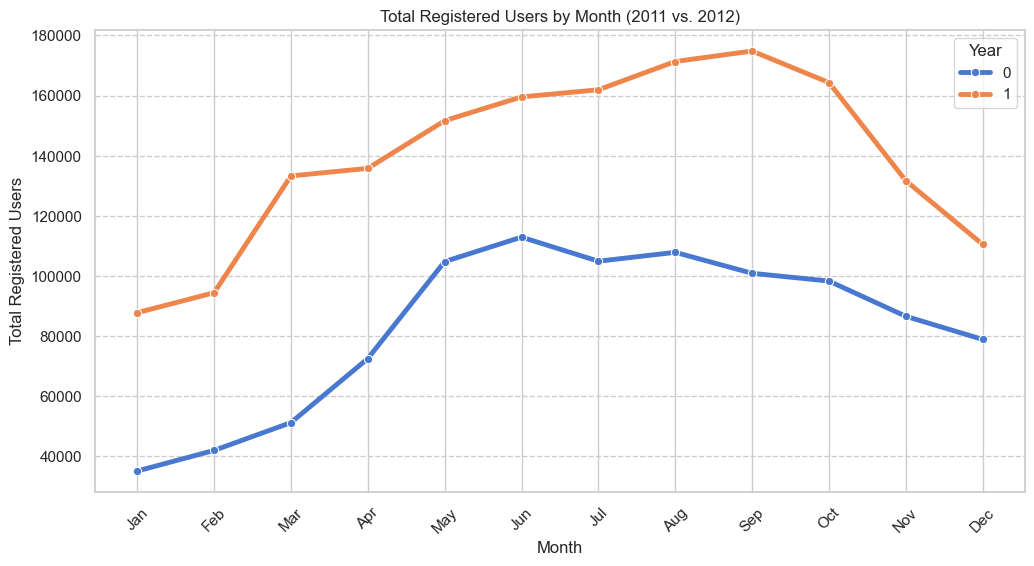

In [37]:
registered_user_df = registered_user_df.sort_values(by=['year', 'month']).reset_index(drop=True)

month_abbrev = {
    'January': 'Jan', 'February': 'Feb', 'March': 'Mar', 'April': 'Apr',
    'May': 'May', 'June': 'Jun', 'July': 'Jul', 'August': 'Aug',
    'September': 'Sep', 'October': 'Oct', 'November': 'Nov', 'December': 'Dec'
}

registered_user_df['month'] = registered_user_df['month'].replace(month_abbrev)

plt.figure(figsize=(12, 6))
sns.lineplot(data=registered_user_df, x='month', y='registered', hue='year', marker='o', palette='muted', linewidth=3.5)

plt.xlabel('Month')
plt.ylabel('Total Registered Users')
plt.title('Total Registered Users by Month (2011 vs. 2012)')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

**Insight:**
- xxx
- xxx

In [39]:
day_dataframe.to_csv("dashboard/new_day_df.csv", index=False)

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2